# __Trying To Open the John Hopkins Data From Github__

https://github.com/CSSEGISandData/COVID-19

# __0. Opening a Single CSV from the Repository Manually__

In [0]:
import pandas as pd
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-10-2020.csv'
df = pd.read_csv(url, error_bad_lines=False)
df

FIPS     Admin2  ... Active                   Combined_Key
0     45001.0  Abbeville  ...     34  Abbeville, South Carolina, US
1     22001.0     Acadia  ...    137          Acadia, Louisiana, US
2     51001.0   Accomack  ...    501         Accomack, Virginia, US
3     16001.0        Ada  ...    714                 Ada, Idaho, US
4     19001.0      Adair  ...      3                Adair, Iowa, US
...       ...        ...  ...    ...                            ...
3229      NaN        NaN  ...    110             West Bank and Gaza
3230      NaN        NaN  ...      1                 Western Sahara
3231      NaN        NaN  ...     42                          Yemen
3232      NaN        NaN  ...    143                         Zambia
3233      NaN        NaN  ...     23                       Zimbabwe

[3234 rows x 12 columns]

# __1. Trying to get all data/organize it__
## List of URLs



Starting from May 10, 2020 in reverse order to May 8, 2020 (To get an idea of formatting)
*   https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-10-2020.csv
*   https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-09-2020.csv
* https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_daily_reports/05-08-2020.csv
-----

* https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv



## Trying to get all available data from this particular github folder and naming them by date

In [0]:
# this takes a while to run cuz im taking the entire csv file XD)
import pandas as pd

df = df.iloc[0:0]

for month in range(1,12):
  for day in range(1,31):
    try:
      url = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/0{month}-0{day}-2020.csv'
      df = df.append(pd.read_csv(url, error_bad_lines=False))
    except:
      pass

In [0]:
df # view the Data frame

FIPS Admin2 Province_State  ...     Last Update Latitude  Longitude
0      NaN    NaN            NaN  ...  2/1/2020 11:53      NaN        NaN
1      NaN    NaN            NaN  ...  2/1/2020 10:53      NaN        NaN
2      NaN    NaN            NaN  ...  2/1/2020 14:23      NaN        NaN
3      NaN    NaN            NaN  ...   2/1/2020 1:52      NaN        NaN
4      NaN    NaN            NaN  ...  2/1/2020 11:03      NaN        NaN
...    ...    ...            ...  ...             ...      ...        ...
3227   NaN    NaN            NaN  ...             NaN      NaN        NaN
3228   NaN    NaN            NaN  ...             NaN      NaN        NaN
3229   NaN    NaN            NaN  ...             NaN      NaN        NaN
3230   NaN    NaN            NaN  ...             NaN      NaN        NaN
3231   NaN    NaN            NaN  ...             NaN      NaN        NaN

[55787 rows x 17 columns]

In [0]:
# only select certain columns of the data frame
df1 = df[['Last_Update','Country_Region','Confirmed','Deaths','Recovered','Active']]

In [0]:
df1

Last_Update      Country_Region  ...  Recovered  Active
0                     NaN                 NaN  ...        168     NaN
1                     NaN                 NaN  ...         21     NaN
2                     NaN                 NaN  ...         14     NaN
3                     NaN                 NaN  ...          3     NaN
4                     NaN                 NaN  ...          8     NaN
...                   ...                 ...  ...        ...     ...
3227  2020-05-10 02:32:30  West Bank and Gaza  ...        228   145.0
3228  2020-05-10 02:32:30      Western Sahara  ...          5     1.0
3229  2020-05-10 02:32:30               Yemen  ...          1    26.0
3230  2020-05-10 02:32:30              Zambia  ...        112   133.0
3231  2020-05-10 02:32:30            Zimbabwe  ...          9    22.0

[55787 rows x 6 columns]

In [0]:
df1.set_index(['Last_Update','Country_Region'])
#grouped = df1.groupby(level=df1.index.names(['Country_Region']))
#grouped.sum()

Confirmed  Deaths  Recovered  Active
Last_Update         Country_Region                                          
NaN                 NaN                      7153     249        168     NaN
                    NaN                       599       0         21     NaN
                    NaN                       535       0         14     NaN
                    NaN                       422       2          3     NaN
                    NaN                       389       0          8     NaN
...                                           ...     ...        ...     ...
2020-05-10 02:32:30 West Bank and Gaza        375       2        228   145.0
                    Western Sahara              6       0          5     1.0
                    Yemen                      34       7          1    26.0
                    Zambia                    252       7        112   133.0
                    Zimbabwe                   35       4          9    22.0

[55787 rows x 4 columns]

In [0]:
df = df.iloc[0:0] # clear data frame

In [0]:
df

Empty DataFrame
Columns: [FIPS, Admin2, Province_State, Country_Region, Last_Update, Lat, Long_, Confirmed, Deaths, Recovered, Active, Combined_Key, Province/State, Country/Region, Last Update, Latitude, Longitude]
Index: []

# __2. Trying With Only US Data LOL__
I was having issues seeing what was happening with all the data so I shall do this first to test stuff

In [0]:
import pandas as pd

df_US = pd.DataFrame() # create an emptry data frame 

for month in ['01','02','03','04','05','06','07','08','09','10','11','12']: # I didn't know how else to get the numbers in the right format for use in the url
  for day in ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19',
              '20','21','22','23','24','25','26','27','28','29','30','31']:
    try: # using 'try' because i didnt want to deal with dates that are non-existent
      # the location of the github repository 
      url = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/{month}-{day}-2020.csv'
      # append new data from a different date onto the bottom of the data frame
      df_US = df_US.append(pd.read_csv(url, error_bad_lines=False))
    except: # if the date does not exist then skip it
      pass

In [0]:
df_US # show the data frame currently

Province_State Country_Region  ... Testing_Rate  Hospitalization_Rate
0         Alabama             US  ...   460.300152             12.264945
1          Alaska             US  ...  1344.711576             11.397059
2         Arizona             US  ...   578.522286                   NaN
3        Arkansas             US  ...   761.753354             10.156250
4      California             US  ...   485.423868             22.961176
..            ...            ...  ...          ...                   ...
53       Virginia             US  ...  3495.710103             16.862201
54     Washington             US  ...  4505.526210             16.197618
55  West Virginia             US  ...  5210.342678                   NaN
56      Wisconsin             US  ...  4315.978507             14.113063
57        Wyoming             US  ...  4020.499033              9.427609

[2964 rows x 18 columns]

In [0]:
# only get certain columns cuz the others are not useful and i dont like them
df_US1 = df_US[['Last_Update','Province_State','Confirmed','Deaths','Recovered','Active','People_Tested']]

In [0]:
df_US1 # show the updated data frame

Last_Update Province_State  ...   Active  People_Tested
0   2020-04-12 23:18:15        Alabama  ...   3470.0        21583.0
1   2020-04-12 23:18:15         Alaska  ...    264.0         8038.0
2   2020-04-12 23:18:15        Arizona  ...   3427.0        42109.0
3   2020-04-12 23:18:15       Arkansas  ...   1253.0        19722.0
4   2020-04-12 23:18:15     California  ...  22155.0       190328.0
..                  ...            ...  ...      ...            ...
53  2020-05-30 02:32:55       Virginia  ...  35527.0       298377.0
54  2020-05-30 02:32:55     Washington  ...  19960.0       343091.0
55  2020-05-30 02:32:55  West Virginia  ...    636.0        93377.0
56  2020-05-30 02:32:55      Wisconsin  ...   6259.0       251295.0
57  2020-05-30 02:32:55        Wyoming  ...    242.0        23269.0

[2964 rows x 7 columns]

In [0]:
# check that the amount of dates are correct by counting the amount of distinct dates in the data frame
num_distinct_dates = df_US.Last_Update.nunique()
print(num_distinct_dates)

50


In [0]:
# try testing with only four of the States 
value_list = ['Alabama','Arizona','California','Washington']
df_US2 = df_US1[df_US1.Province_State.isin(value_list)] # im not sure i need this line... i dont remember what i was trying to do lol

# Split the original data frame into four sets
Alabama_Stats = df_US2.groupby(['Province_State']).get_group('Alabama')
Arizona_Stats = df_US2.groupby(['Province_State']).get_group('Arizona')
Cali_Stats = df_US2.groupby(['Province_State']).get_group('California')
Washington_Stats = df_US2.groupby(['Province_State']).get_group('Washington')

In [0]:
print(Alabama_Stats.People_Tested.dtype) # check that stuff works 

float64


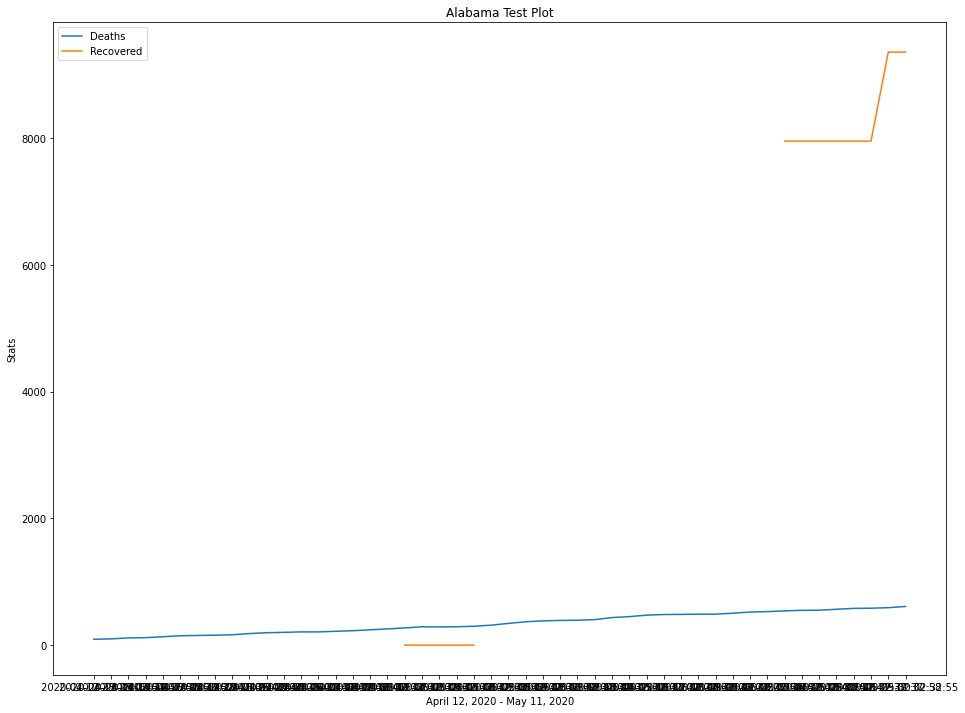

In [0]:
import matplotlib.pyplot as plt

# Now to revisualize this data 
#Create plot
fig,ax = plt.subplots()
fig.set_size_inches(16,12)
fig.set_facecolor('w')  #Used for dark mode

plt.plot(Alabama_Stats['Last_Update'], Alabama_Stats['Deaths'], label = 'Deaths')
#plt.plot(Alabama_Stats['Last_Update'], Alabama_Stats['Confirmed'], label = 'Comfirmed Cases')
plt.plot(Alabama_Stats['Last_Update'], Alabama_Stats['Recovered'], label = 'Recovered')
plt.title('Alabama Test Plot')

plt.xlabel('April 12, 2020 - May 11, 2020')
plt.ylabel('Stats')
plt.legend(loc='upper left')
plt.show()

### The x-axis is soo messy so i am gonna try and change the dates to a nicer format

In [0]:
import numpy as np

# reset the indexes for the data frame cuz they were funky and all 0 before?
count = Alabama_Stats.Last_Update.nunique()
s = np.arange(0,count,1)
Alabama_Stats.set_index([s])

Last_Update Province_State  ...   Active  People_Tested
0   2020-04-12 23:18:15        Alabama  ...   3470.0        21583.0
1   2020-04-13 23:07:54        Alabama  ...   3635.0        29182.0
2   2020-04-14 23:33:31        Alabama  ...   3839.0        33117.0
3   2020-04-15 22:56:51        Alabama  ...   3957.0        34077.0
4   2020-04-16 23:30:51        Alabama  ...   4212.0        36391.0
5   2020-04-17 23:30:52        Alabama  ...   4423.0        37848.0
6   2020-04-18 22:32:47        Alabama  ...   4559.0        42538.0
7   2020-04-19 23:41:01        Alabama  ...   4731.0        45712.0
8   2020-04-20 23:36:47        Alabama  ...   4916.0        45900.0
9   2020-04-21 23:40:34        Alabama  ...   5134.0        48526.0
10  2020-04-22 23:40:26        Alabama  ...   5397.0        48760.0
11  2020-04-24 03:33:00        Alabama  ...   5630.0        52641.0
12  2020-04-25 06:32:46        Alabama  ...   5817.0        52889.0
13  2020-04-26 02:32:45        Alabama  ...   5817.0        71344.0
14  2020-04-27 02:32:46        Alabama  ...   6202.0        73551.0
15  2020-04-28 02:32:46        Alabama  ...   6311.0        73997.0
16  2020-04-29 02:32:33        Alabama  ...   6508.0        75827.0
17  2020-04-30 02:32:31        Alabama  ...   6656.0        80449.0
18  2020-05-01 02:32:32        Alabama  ...   6816.0        87196.0
19  2020-05-02 02:32:31        Alabama  ...   7005.0        91933.0
20  2020-05-03 02:32:33        Alabama  ...   7323.0        92209.0
21  2020-05-04 02:32:32        Alabama  ...   7598.0        92500.0
22  2020-05-05 02:32:38        Alabama  ...   7814.0       103117.0
23  2020-05-06 02:32:35        Alabama  ...   8122.0       106766.0
24  2020-05-07 02:32:32        Alabama  ...   8348.0       109516.0
25  2020-05-08 02:32:36        Alabama  ...   8677.0       115173.0
26  2020-05-09 02:32:39        Alabama  ...   9002.0       120114.0
27  2020-05-10 02:32:34        Alabama  ...   9278.0       125494.0
28  2020-05-11 02:32:34        Alabama  ...   9496.0       127421.0
29  2020-05-12 03:32:31        Alabama  ...   9761.0       129444.0
30  2020-05-13 03:32:30        Alabama  ...  10029.0       133218.0
31  2020-05-14 03:32:32        Alabama  ...  10250.0       136372.0
32  2020-05-15 02:33:07        Alabama  ...  10628.0       141985.0
33  2020-05-16 02:32:24        Alabama  ...  10890.0       146063.0
34  2020-05-17 02:32:37        Alabama  ...  11189.0       153494.0
35  2020-05-18 02:32:26        Alabama  ...  11283.0       156350.0
36  2020-05-19 02:32:23        Alabama  ...  11597.0       157123.0
37  2020-05-20 02:32:25        Alabama  ...  11872.0       157566.0
38  2020-05-21 02:32:54        Alabama  ...  12530.0       164450.0
39  2020-05-22 02:36:57        Alabama  ...  12759.0       170739.0
40  2020-05-23 02:32:47        Alabama  ...   5178.0       177768.0
41  2020-05-24 02:32:48        Alabama  ...   5617.0       182676.0
42  2020-05-25 02:32:50        Alabama  ...   5976.0       185799.0
43  2020-05-26 02:32:41        Alabama  ...   6469.0       190315.0
44  2020-05-27 02:32:37        Alabama  ...   7119.0       193759.0
45  2020-05-28 02:32:37        Alabama  ...   7498.0       195794.0
46  2020-05-29 02:32:58        Alabama  ...   6584.0       200481.0
47  2020-05-30 02:32:55        Alabama  ...   7066.0       208883.0

[48 rows x 7 columns]

In [0]:
for i in s: # only keep the month and day part of the string
  x = Alabama_Stats.iat[i,0]
  Alabama_Stats.iat[i,0] = x[5:10]

  y = Arizona_Stats.iat[i,0]
  Arizona_Stats.iat[i,0] = y[5:10]

  z = Cali_Stats.iat[i,0]
  Cali_Stats.iat[i,0] = z[5:10]

  a = Washington_Stats.iat[i,0]
  Washington_Stats.iat[i,0] = a[5:10]

In [0]:
Alabama_Stats # check the data
# i noticed that the Recovered numbers for Alabama were 0 for most of them lol so i shall try plotting someting different

Arizona_Stats

Last_Update Province_State  Confirmed  ...  Recovered   Active  People_Tested
2       04-12        Arizona       3542  ...        NaN   3427.0        42109.0
3       04-13        Arizona       3705  ...        NaN   3583.0        43347.0
3       04-14        Arizona       3809  ...      249.0   3678.0        44096.0
3       04-15        Arizona       3964  ...      385.0   3822.0        45310.0
3       04-16        Arizona       4237  ...      460.0   4087.0        47398.0
3       04-17        Arizona       4511  ...      539.0   4342.0        49230.0
3       04-18        Arizona       4724  ...      539.0   4544.0        51045.0
3       04-19        Arizona       4933  ...      994.0   4749.0        52990.0
3       04-20        Arizona       5068  ...     1155.0   4877.0        54500.0
3       04-21        Arizona       5256  ...     1155.0   5048.0        55152.0
3       04-22        Arizona       5473  ...     1265.0   5242.0        56601.0
3       04-24        Arizona       5772  ...     1282.0   5523.0        58697.0
3       04-25        Arizona       6045  ...     1313.0   5779.0        60714.0
3       04-26        Arizona       6286  ...     1345.0   6013.0        62508.0
3       04-27        Arizona       6534  ...     1383.0   6259.0        64811.0
3       04-28        Arizona       6725  ...     1418.0   6450.0        66543.0
3       04-29        Arizona       6955  ...     1450.0   6680.0        67438.0
3       04-30        Arizona       7209  ...     1475.0   6901.0        68813.0
3       05-01        Arizona       7655  ...     1499.0   5836.0        71786.0
3       05-02        Arizona       7969  ...     1528.0   6111.0        74879.0
3       05-03        Arizona       8364  ...     1565.0   6469.0        77997.0
3       05-04        Arizona       8640  ...     1597.0   6681.0        81119.0
3       05-05        Arizona       8924  ...     1632.0   6930.0        85253.0
3       05-06        Arizona       9305  ...     1671.0   7239.0        88260.0
3       05-07        Arizona       9707  ...     1693.0   7588.0        91737.0
3       05-08        Arizona       9945  ...     1722.0   7773.0       111086.0
3       05-09        Arizona      10526  ...     1747.0   8262.0       119907.0
3       05-10        Arizona      10960  ...     2684.0   7744.0       128940.0
3       05-11        Arizona      11119  ...     2775.0   7808.0       137739.0
3       05-12        Arizona      11383  ...     2852.0   7989.0       150241.0
3       05-13        Arizona      11736  ...     2909.0   8265.0       122842.0
3       05-14        Arizona      12216  ...     2979.0   8642.0       127750.0
3       05-15        Arizona      12674  ...     3074.0   8976.0       134338.0
3       05-16        Arizona      13169  ...     3145.0   9373.0       142001.0
3       05-17        Arizona      13666  ...     3357.0   9630.0       146788.0
3       05-18        Arizona      13945  ...     3450.0   9815.0       151761.0
3       05-19        Arizona      14208  ...     3570.0   9951.0       156473.0
3       05-20        Arizona      14576  ...     3693.0  10178.0       161571.0
3       05-21        Arizona      14906  ...     3773.0  10386.0       165435.0
3       05-22        Arizona      15348  ...     3872.0  10712.0       171627.0
3       05-23        Arizona      15624  ...     3949.0  10900.0       176003.0
3       05-24        Arizona      16053  ...     4033.0  11219.0       180439.0
3       05-25        Arizona      16377  ...     4132.0  11444.0       183641.0
3       05-26        Arizona      16575  ...     4204.0  11564.0       187782.0
3       05-27        Arizona      16864  ...     4297.0  11757.0       190731.0
3       05-28        Arizona      17318  ...     4361.0  12123.0       196266.0
3       05-29        Arizona      17877  ...     4452.0  12565.0       202914.0
3       05-30        Arizona      18472  ...     4551.0  13035.0       209813.0

[48 rows x 7 columns]

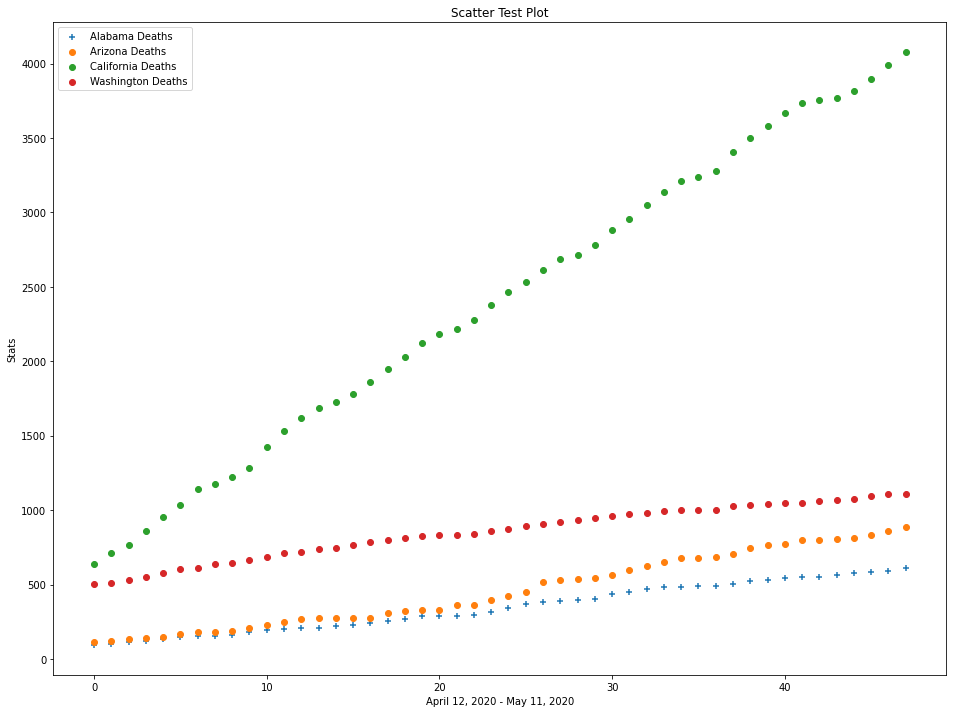

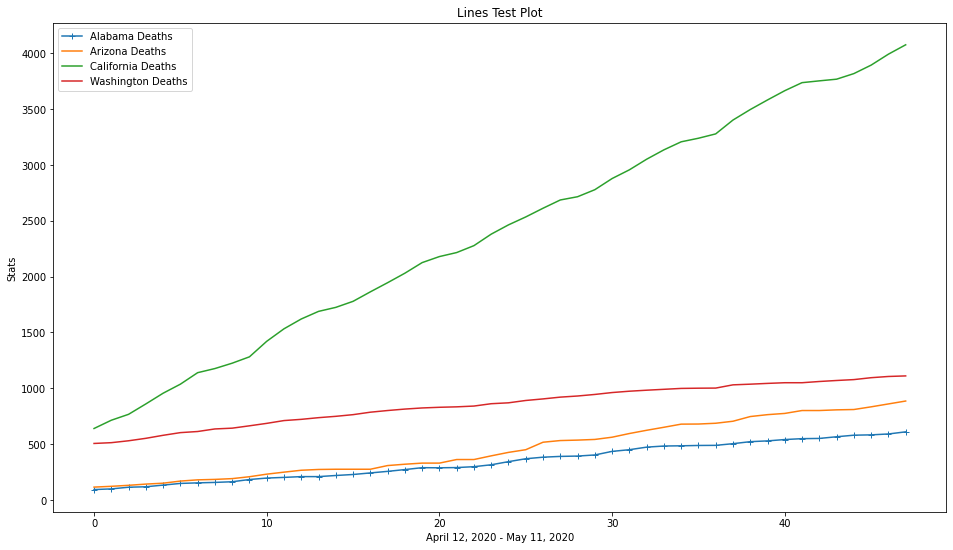

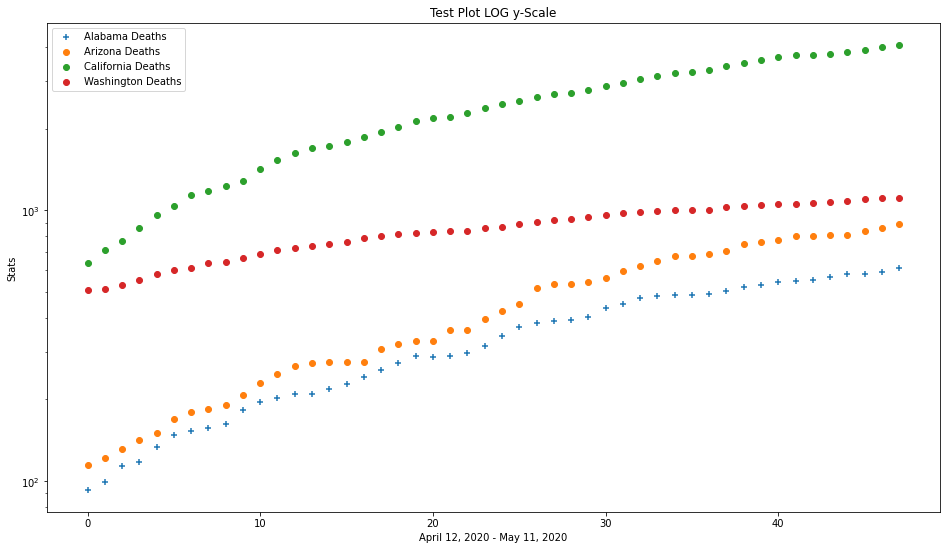

In [0]:
import matplotlib.pyplot as plt

# All this Data is the same i was just trying differnt types of plots
#Create plot
fig,ax = plt.subplots()
fig.set_size_inches(16,12)
fig.set_facecolor('w')  #Used for dark mode

plt.scatter(s, Alabama_Stats['Deaths'], marker = '+', label = 'Alabama Deaths') # 's' was the variable for the range of dates
plt.scatter(s, Arizona_Stats['Deaths'], label = 'Arizona Deaths')
plt.scatter(s, Cali_Stats['Deaths'], label = 'California Deaths')
plt.scatter(s, Washington_Stats['Deaths'], label = 'Washington Deaths')
plt.title('Scatter Test Plot')

plt.xlabel('April 12, 2020 - May 11, 2020')
plt.ylabel('Stats')
plt.legend(loc='upper left')
plt.show()

# using plot instead of scatter
plt.figure(figsize = (16,9))
plt.plot(s, Alabama_Stats['Deaths'], marker = '+', label = 'Alabama Deaths') # 's' was the variable for the range of dates
plt.plot(s, Arizona_Stats['Deaths'], label = 'Arizona Deaths')
plt.plot(s, Cali_Stats['Deaths'], label = 'California Deaths')
plt.plot(s, Washington_Stats['Deaths'], label = 'Washington Deaths')
plt.title('Lines Test Plot')

plt.xlabel('April 12, 2020 - May 11, 2020')
plt.ylabel('Stats')
plt.legend(loc='upper left')
plt.show()

# using log y-scale 
plt.figure(figsize = (16,9))
plt.scatter(s, Alabama_Stats['Deaths'], marker = '+', label = 'Alabama Deaths') # 's' was the variable for the range of dates
plt.scatter(s, Arizona_Stats['Deaths'], label = 'Arizona Deaths')
plt.scatter(s, Cali_Stats['Deaths'], label = 'California Deaths')
plt.scatter(s, Washington_Stats['Deaths'], label = 'Washington Deaths')
plt.title('Test Plot LOG y-Scale')

plt.yscale('log')
plt.xlabel('April 12, 2020 - May 11, 2020')
plt.ylabel('Stats')
plt.legend(loc='upper left')
plt.show()

## __2.1 Now try to do for all states instead of just the four i tested with__

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Diamond Princess' 'District of Columbia'
 'Florida' 'Georgia' 'Grand Princess' 'Guam' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington' 'West Virginia'
 'Wisconsin' 'Wyoming' 'American Samoa' 'Northern Mariana Islands'
 'Recovered' 'Virgin Islands' 'Alberta' 'Anguilla' 'Anhui' 'Aruba'
 'Australian Capital Territory' 'Beijing' 'Bermuda'
 'Bonaire, Sint Eustatius and Saba' 'British Columbia'
 'British Virgin Islands' 'Cayman Islands' 'Channel Islands' 'Chongqing'
 'Curacao' 'Falkland Islands (Malvinas)' 'Faroe

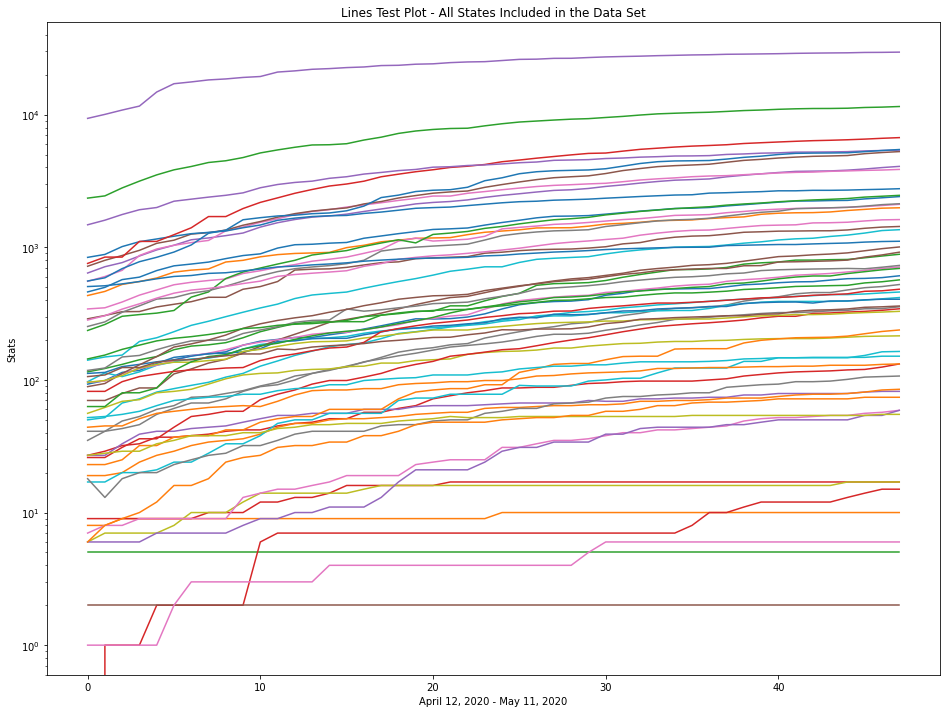

In [0]:
# a more generalized version trying to use all the states instead of just four:
general_list = df_US1.Province_State.unique()
print(general_list) # i thought this data was only for the US but apparently not lol
df_US3 = df_US1[df_US1.Province_State.isin(general_list)]

#Create plot
fig,ax = plt.subplots()
fig.set_size_inches(16,12)
fig.set_facecolor('w')  #Used for dark mode

for state in general_list:
  try:
    to_plot = df_US3.groupby(['Province_State']).get_group(f'{state}')

    plt.plot(s, to_plot['Deaths'], label = f'{state} Deaths') # 's' was the variable for the range of dates
    plt.title('Lines Test Plot - All States Included in the Data Set')

    plt.yscale('log')
    plt.xlabel('April 12, 2020 - May 11, 2020')
    plt.ylabel('Stats')
    #plt.legend(loc='upper left')
  except:
    pass

plt.show()

In [0]:
# https://statesymbolsusa.org/symbol-official-item/national-us/uncategorized/states-size


### yikes well it works but also is very messy... that is very busy...

Try to now do the same thing as above but select which states we want to do it for instead of just plotting everything

Enter a State with first letter Capitalized. (enter 'plot' to display plot of all states selected): New York
State has been added to list and will be plotted
Enter a State with first letter Capitalized. (enter 'plot' to display plot of all states selected): Michigan
State has been added to list and will be plotted
Enter a State with first letter Capitalized. (enter 'plot' to display plot of all states selected): New Jersey
State has been added to list and will be plotted
Enter a State with first letter Capitalized. (enter 'plot' to display plot of all states selected): Texas
State has been added to list and will be plotted
Enter a State with first letter Capitalized. (enter 'plot' to display plot of all states selected): California
State has been added to list and will be plotted
Enter a State with first letter Capitalized. (enter 'plot' to display plot of all states selected): Florida
State has been added to list and will be plotted
Enter a State with first letter Capitalized. (enter 

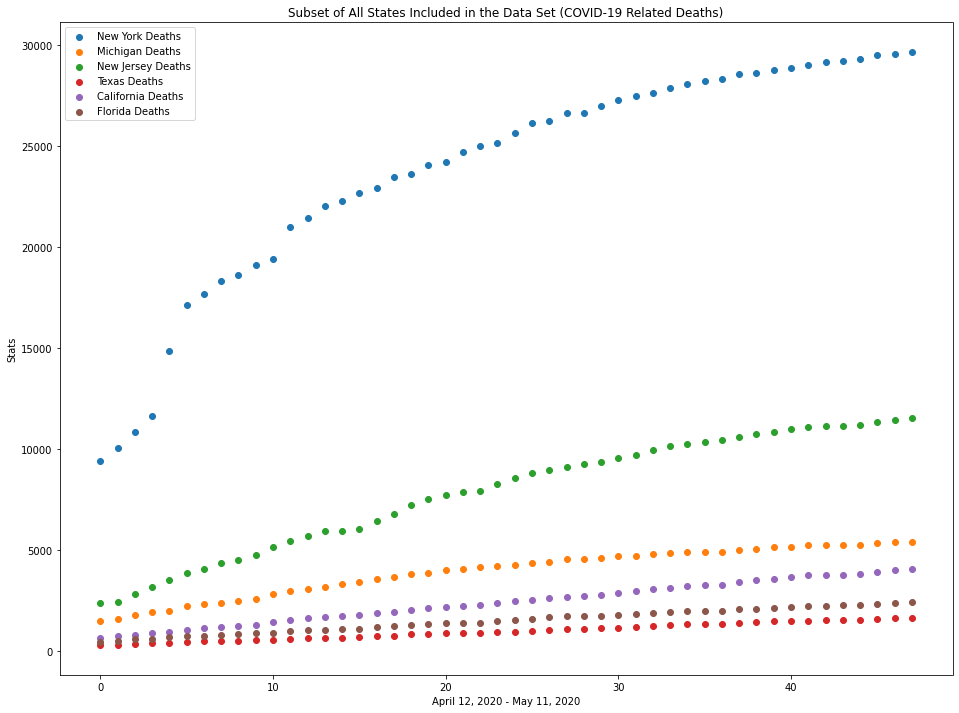

In [0]:
# a more generalized version trying to use all the states instead of just four but you can now select which states:
from termcolor import colored # oh dang colour is fun

SENTINEL = 'something'
entered_list = []
general_list = df_US1.Province_State.unique() # the complete list of states

# entering states that we wish to display. am too lazy to fix strings that are formatted wrong so i shall just throw errors instead 
while SENTINEL != 'plot':
  x = input("Enter a State with first letter Capitalized. (enter 'plot' to display plot of all states selected): ")
  if x in general_list:
    if x not in entered_list:
      entered_list.append(x)
      print(colored("State has been added to list and will be plotted","green"))
    else:
      print(colored("State already added to plot",'yellow'))
  elif x == 'plot':
      SENTINEL = x
  else:
    print(colored("Error: State is formatted incorrectly or does not exsit in our data set.",'red'))

# the rest of the code is the same as above
df_US4 = df_US1[df_US1.Province_State.isin(entered_list)]

#Create plot
fig,ax = plt.subplots()
fig.set_size_inches(16,12)
fig.set_facecolor('w')  #Used for dark mode

for state in entered_list:
  try:
    to_plot = df_US4.groupby(['Province_State']).get_group(f'{state}')

    plt.scatter(s, to_plot['Deaths'], label = f'{state} Deaths') # 's' was the variable for the range of dates
    plt.title('Subset of All States Included in the Data Set (COVID-19 Related Deaths)')

    #plt.yscale('log')
    plt.xlabel('April 12, 2020 - May 11, 2020')
    plt.ylabel('Stats')
    plt.legend(loc='upper left')
  except:
    pass

plt.show()

## 2.2 Now plot deaths versus population density... i need to calculate population density though for each state first:


To run this section of code, the first two cells in section 2 must be run first.

In [0]:
# Land area for each state from here: https://statesymbolsusa.org/symbol-official-item/national-us/uncategorized/states-size
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [0]:
# # open files from computer
# from google.colab import files
# uploaded = files.upload()

In [0]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')
# !ls /content/drive/

# !ls /content/drive/My\ Drive/STEM\ Fellowship\ -\ Undergrad\ BDC\ 2020/Datasets/Population\ Density\ \(for\ #4\)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# read files
root = '/content/drive/My Drive/STEM Fellowship - Undergrad BDC 2020/Datasets/Population Density (for #4)/'
pop = pd.read_csv(root + 'Population Estimates by State.csv')
area = pd.read_csv(root + 'State_Land_Area.csv')
# pop
# area

In [0]:
# clean the data
# remove random \t from end of some of the state names
for i in range(area.shape[0]):
  x = area.State[i]

  if x[-1] == '\t':
    area.State[i] = x[:-1]
  else:
    pass 

# formatting the population data
pop.columns = ['State', 'Population']
pop1 = pop.iloc[1:51, :]
pop1['Population'] = pop1['Population'].str.replace(',', '')
pop1.Population = pd.to_numeric(pop1.Population)
pop1 = pop1.set_index('State')

# formatting the land area data
area1 = area.set_index('State')
#area1

result = pd.concat([pop1, area1], axis=1)
df = result.dropna()
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

Population   Square_Miles
Alabama          4903185.0        50744.0
Alaska            731545.0       571951.0
Arizona          7278717.0       113635.0
Arkansas         3017804.0        52068.0
California      39512223.0       155959.0
Colorado         5758736.0       103718.0
Connecticut      3565287.0         4845.0
Delaware          973764.0         1954.0
Florida         21477737.0        53927.0
Georgia         10617423.0        57906.0
Hawaii           1415872.0         6423.0
Idaho            1787065.0        82747.0
Illinois        12671821.0        55584.0
Indiana          6732219.0        35867.0
Iowa             3155070.0        55869.0
Kansas           2913314.0        81815.0
Kentucky         4467673.0        39728.0
Louisiana        4648794.0        43562.0
Maine            1344212.0        30862.0
Maryland         6045680.0         9774.0
Massachusetts    6892503.0         7840.0
Michigan         9986857.0        56804.0
Minnesota        5639632.0        79610.0
Mississippi      2976149.0        46907.0
Missouri         6137428.0        68886.0
Montana          1068778.0       145552.0
Nebraska         1934408.0        76872.0
Nevada           3080156.0       109826.0
New Hampshire    1359711.0         8968.0
New Jersey       8882190.0         7417.0
New Mexico       2096829.0       121356.0
New York        19453561.0        47214.0
North Carolina  10488084.0        48711.0
North Dakota      762062.0        68976.0
Ohio            11689100.0        40948.0
Oklahoma         3956971.0        68667.0
Oregon           4217737.0        95997.0
Pennsylvania    12801989.0        44817.0
Rhode Island     1059361.0         1045.0
South Carolina   5148714.0        30110.0
South Dakota      884659.0        75885.0
Tennessee        6829174.0        41217.0
Texas           28995881.0       261797.0
Utah             3205958.0        82144.0
Vermont           623989.0         9250.0
Virginia         8535519.0        39594.0
Washington       7614893.0        66544.0
West Virginia    1792147.0        24078.0
Wisconsin        5822434.0        54310.0

In [0]:
# calculate the population density since we were only given population and land area for each state
# now create a third column in the data frame with te population density
pop_den  = []

for i in range(0,df.shape[0],1):
  pop_den.append(df.iat[i,0]/df.iat[i,1])

pop_den1 = pd.DataFrame(pop_den)
pop_den1 = pop_den1.set_index(df.index)
pop_den1.columns = ['Pop_Per_Sq_Mile']

In [0]:
# clean the US confirmed cases data
current_stats = df_US.groupby(['Last_Update']).get_group(df_US.iat[-1,2])
current_stats = current_stats.set_index('Province_State')
current_confirmed = current_stats[['Confirmed']]
current_confirmed

Confirmed
Province_State                     
Alabama                       16530
Alaska                          424
American Samoa                    0
Arizona                       17877
Arkansas                       6538
California                   103813
Colorado                      25107
Connecticut                   41559
Delaware                       9171
Diamond Princess                 49
District of Columbia           8492
Florida                       53285
Georgia                       45266
Grand Princess                  103
Guam                            171
Hawaii                          647
Idaho                          2770
Illinois                     115833
Indiana                       33068
Iowa                          18586
Kansas                         9371
Kentucky                       9185
Louisiana                     38802
Maine                          2189
Maryland                      49709
Massachusetts                 94895
Michigan                      56014
Minnesota                     22947
Mississippi                   14372
Missouri                      12981
Montana                         485
Nebraska                      13249
Nevada                         8248
New Hampshire                  4389
New Jersey                   157185
New Mexico                     7364
New York                     366733
North Carolina                25800
North Dakota                   2481
Northern Mariana Islands         22
Ohio                          33915
Oklahoma                       6273
Oregon                         4086
Pennsylvania                  74220
Puerto Rico                    3486
Rhode Island                  14494
South Carolina                10788
South Dakota                   4793
Tennessee                     21679
Texas                         60395
Utah                           8921
Vermont                         974
Virgin Islands                   69
Virginia                      41401
Washington                    20764
West Virginia                  1935
Wisconsin                     16974
Wyoming                         876

In [0]:
# join all the data into a single data frame
df_final = pd.concat([current_confirmed, df, pop_den1], axis=1)
df_final = df_final.dropna()
df_final

Confirmed  Population   Square_Miles  Pop_Per_Sq_Mile
Alabama             16530   4903185.0        50744.0        96.625907
Alaska                424    731545.0       571951.0         1.279034
Arizona             17877   7278717.0       113635.0        64.053478
Arkansas             6538   3017804.0        52068.0        57.958900
California         103813  39512223.0       155959.0       253.350066
Colorado            25107   5758736.0       103718.0        55.523014
Connecticut         41559   3565287.0         4845.0       735.869350
Delaware             9171    973764.0         1954.0       498.343910
Florida             53285  21477737.0        53927.0       398.274278
Georgia             45266  10617423.0        57906.0       183.356181
Hawaii                647   1415872.0         6423.0       220.437802
Idaho                2770   1787065.0        82747.0        21.596735
Illinois           115833  12671821.0        55584.0       227.976054
Indiana             33068   6732219.0        35867.0       187.699529
Iowa                18586   3155070.0        55869.0        56.472641
Kansas               9371   2913314.0        81815.0        35.608556
Kentucky             9185   4467673.0        39728.0       112.456529
Louisiana           38802   4648794.0        43562.0       106.716726
Maine                2189   1344212.0        30862.0        43.555570
Maryland            49709   6045680.0         9774.0       618.547166
Massachusetts       94895   6892503.0         7840.0       879.145791
Michigan            56014   9986857.0        56804.0       175.812566
Minnesota           22947   5639632.0        79610.0        70.840749
Mississippi         14372   2976149.0        46907.0        63.447865
Missouri            12981   6137428.0        68886.0        89.095433
Montana               485   1068778.0       145552.0         7.342929
Nebraska            13249   1934408.0        76872.0        25.164013
Nevada               8248   3080156.0       109826.0        28.045782
New Hampshire        4389   1359711.0         8968.0       151.618087
New Jersey         157185   8882190.0         7417.0      1197.544829
New Mexico           7364   2096829.0       121356.0        17.278330
New York           366733  19453561.0        47214.0       412.029504
North Carolina      25800  10488084.0        48711.0       215.312435
North Dakota         2481    762062.0        68976.0        11.048220
Ohio                33915  11689100.0        40948.0       285.462049
Oklahoma             6273   3956971.0        68667.0        57.625512
Oregon               4086   4217737.0        95997.0        43.936133
Pennsylvania        74220  12801989.0        44817.0       285.650289
Rhode Island        14494   1059361.0         1045.0      1013.742584
South Carolina      10788   5148714.0        30110.0       170.996812
South Dakota         4793    884659.0        75885.0        11.657890
Tennessee           21679   6829174.0        41217.0       165.688284
Texas               60395  28995881.0       261797.0       110.757117
Utah                 8921   3205958.0        82144.0        39.028511
Vermont               974    623989.0         9250.0        67.458270
Virginia            41401   8535519.0        39594.0       215.576072
Washington          20764   7614893.0        66544.0       114.433953
West Virginia        1935   1792147.0        24078.0        74.430891
Wisconsin           16974   5822434.0        54310.0       107.207402

Text(0.5, 1.0, 'Confirmed Cases Versus Population Density For Most Recent Data on Each US State')

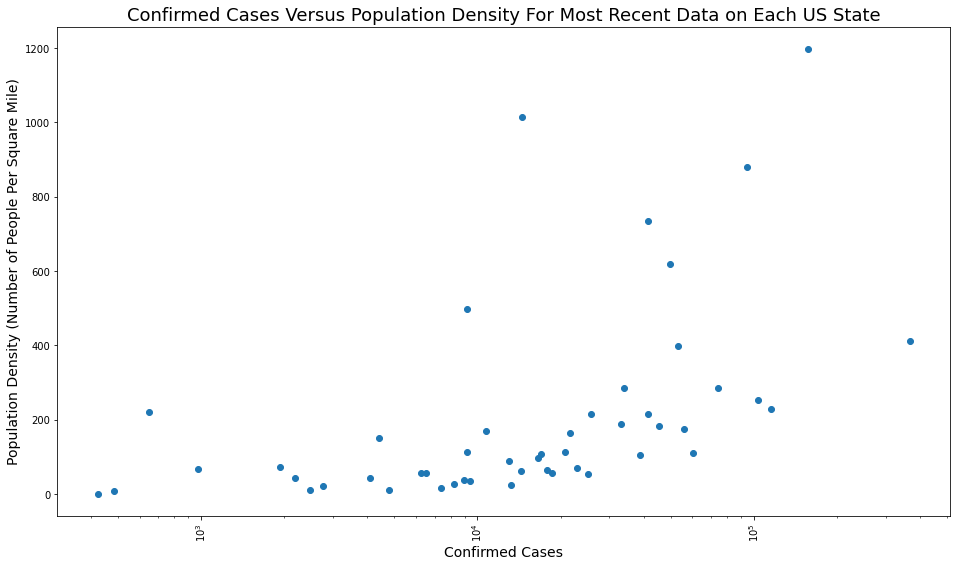

In [0]:
# plot the data where each point represents a state
fig,ax = plt.subplots()
plt.xticks(rotation = 'vertical')
fig.set_size_inches(16,9)
fig.set_facecolor('w')

plt.scatter( df_final.Confirmed, df_final.Pop_Per_Sq_Mile)
plt.xlabel('Confirmed Cases', fontsize = 14)
plt.ylabel('Population Density (Number of People Per Square Mile)', fontsize=14)
plt.xscale('log')
plt.title('Confirmed Cases Versus Population Density For Most Recent Data on Each US State', fontsize = 18)

Im not sure much meaningful data comes from this... i plotted the x-axis on a log scale because otherwise the points (representing each state in the US) were all clustered around the origin. Might have to go deeper to communities within the states if we can find covid case data for that specific of a region. We could also label each point with what state it is but I dont think I will since this data doesnt have much of a trend anyway. 

# **3. Back to trying the Original 4 States but now plotting new confirmed cases per day**

In [0]:
Cali_Stats.shape[0]

48

In [0]:
# the way i did this was kinda weird since all the numbers will be offset from the appropriate day by 1...
def get_new_confirmed(og_State_Data):
  State_Data = og_State_Data.copy()

  for row in range(0,(State_Data.shape[0]),1):
    try:
      State_Data.iat[row,2] = State_Data.iat[row+1,2] - State_Data.iat[row,2]
    except:
      State_Data.iat[row,2] = 0 # this will apply to the last row of the table and the plots should be plotted as scatter or some other form that takes into account that this is not a measurement
    
  return State_Data

In [0]:
new_alabama_stats = get_new_confirmed(Alabama_Stats)
new_cali_stats = get_new_confirmed(Cali_Stats)
new_washington_stats = get_new_confirmed(Washington_Stats)
new_arizona_stats = get_new_confirmed(Arizona_Stats)
new_arizona_stats # check

Last_Update Province_State  Confirmed  ...  Recovered   Active  People_Tested
2       04-12        Arizona        163  ...        NaN   3427.0        42109.0
3       04-13        Arizona        104  ...        NaN   3583.0        43347.0
3       04-14        Arizona        155  ...      249.0   3678.0        44096.0
3       04-15        Arizona        273  ...      385.0   3822.0        45310.0
3       04-16        Arizona        274  ...      460.0   4087.0        47398.0
3       04-17        Arizona        213  ...      539.0   4342.0        49230.0
3       04-18        Arizona        209  ...      539.0   4544.0        51045.0
3       04-19        Arizona        135  ...      994.0   4749.0        52990.0
3       04-20        Arizona        188  ...     1155.0   4877.0        54500.0
3       04-21        Arizona        217  ...     1155.0   5048.0        55152.0
3       04-22        Arizona        299  ...     1265.0   5242.0        56601.0
3       04-24        Arizona        273  ...     1282.0   5523.0        58697.0
3       04-25        Arizona        241  ...     1313.0   5779.0        60714.0
3       04-26        Arizona        248  ...     1345.0   6013.0        62508.0
3       04-27        Arizona        191  ...     1383.0   6259.0        64811.0
3       04-28        Arizona        230  ...     1418.0   6450.0        66543.0
3       04-29        Arizona        254  ...     1450.0   6680.0        67438.0
3       04-30        Arizona        446  ...     1475.0   6901.0        68813.0
3       05-01        Arizona        314  ...     1499.0   5836.0        71786.0
3       05-02        Arizona        395  ...     1528.0   6111.0        74879.0
3       05-03        Arizona        276  ...     1565.0   6469.0        77997.0
3       05-04        Arizona        284  ...     1597.0   6681.0        81119.0
3       05-05        Arizona        381  ...     1632.0   6930.0        85253.0
3       05-06        Arizona        402  ...     1671.0   7239.0        88260.0
3       05-07        Arizona        238  ...     1693.0   7588.0        91737.0
3       05-08        Arizona        581  ...     1722.0   7773.0       111086.0
3       05-09        Arizona        434  ...     1747.0   8262.0       119907.0
3       05-10        Arizona        159  ...     2684.0   7744.0       128940.0
3       05-11        Arizona        264  ...     2775.0   7808.0       137739.0
3       05-12        Arizona        353  ...     2852.0   7989.0       150241.0
3       05-13        Arizona        480  ...     2909.0   8265.0       122842.0
3       05-14        Arizona        458  ...     2979.0   8642.0       127750.0
3       05-15        Arizona        495  ...     3074.0   8976.0       134338.0
3       05-16        Arizona        497  ...     3145.0   9373.0       142001.0
3       05-17        Arizona        279  ...     3357.0   9630.0       146788.0
3       05-18        Arizona        263  ...     3450.0   9815.0       151761.0
3       05-19        Arizona        368  ...     3570.0   9951.0       156473.0
3       05-20        Arizona        330  ...     3693.0  10178.0       161571.0
3       05-21        Arizona        442  ...     3773.0  10386.0       165435.0
3       05-22        Arizona        276  ...     3872.0  10712.0       171627.0
3       05-23        Arizona        429  ...     3949.0  10900.0       176003.0
3       05-24        Arizona        324  ...     4033.0  11219.0       180439.0
3       05-25        Arizona        198  ...     4132.0  11444.0       183641.0
3       05-26        Arizona        289  ...     4204.0  11564.0       187782.0
3       05-27        Arizona        454  ...     4297.0  11757.0       190731.0
3       05-28        Arizona        559  ...     4361.0  12123.0       196266.0
3       05-29        Arizona        595  ...     4452.0  12565.0       202914.0
3       05-30        Arizona          0  ...     4551.0  13035.0       209813.0

[48 rows x 7 columns]

In [0]:
# Compare to the original data to check that i did it right...
Arizona_Stats

Last_Update Province_State  Confirmed  ...  Recovered   Active  People_Tested
2       04-12        Arizona       3542  ...        NaN   3427.0        42109.0
3       04-13        Arizona       3705  ...        NaN   3583.0        43347.0
3       04-14        Arizona       3809  ...      249.0   3678.0        44096.0
3       04-15        Arizona       3964  ...      385.0   3822.0        45310.0
3       04-16        Arizona       4237  ...      460.0   4087.0        47398.0
3       04-17        Arizona       4511  ...      539.0   4342.0        49230.0
3       04-18        Arizona       4724  ...      539.0   4544.0        51045.0
3       04-19        Arizona       4933  ...      994.0   4749.0        52990.0
3       04-20        Arizona       5068  ...     1155.0   4877.0        54500.0
3       04-21        Arizona       5256  ...     1155.0   5048.0        55152.0
3       04-22        Arizona       5473  ...     1265.0   5242.0        56601.0
3       04-24        Arizona       5772  ...     1282.0   5523.0        58697.0
3       04-25        Arizona       6045  ...     1313.0   5779.0        60714.0
3       04-26        Arizona       6286  ...     1345.0   6013.0        62508.0
3       04-27        Arizona       6534  ...     1383.0   6259.0        64811.0
3       04-28        Arizona       6725  ...     1418.0   6450.0        66543.0
3       04-29        Arizona       6955  ...     1450.0   6680.0        67438.0
3       04-30        Arizona       7209  ...     1475.0   6901.0        68813.0
3       05-01        Arizona       7655  ...     1499.0   5836.0        71786.0
3       05-02        Arizona       7969  ...     1528.0   6111.0        74879.0
3       05-03        Arizona       8364  ...     1565.0   6469.0        77997.0
3       05-04        Arizona       8640  ...     1597.0   6681.0        81119.0
3       05-05        Arizona       8924  ...     1632.0   6930.0        85253.0
3       05-06        Arizona       9305  ...     1671.0   7239.0        88260.0
3       05-07        Arizona       9707  ...     1693.0   7588.0        91737.0
3       05-08        Arizona       9945  ...     1722.0   7773.0       111086.0
3       05-09        Arizona      10526  ...     1747.0   8262.0       119907.0
3       05-10        Arizona      10960  ...     2684.0   7744.0       128940.0
3       05-11        Arizona      11119  ...     2775.0   7808.0       137739.0
3       05-12        Arizona      11383  ...     2852.0   7989.0       150241.0
3       05-13        Arizona      11736  ...     2909.0   8265.0       122842.0
3       05-14        Arizona      12216  ...     2979.0   8642.0       127750.0
3       05-15        Arizona      12674  ...     3074.0   8976.0       134338.0
3       05-16        Arizona      13169  ...     3145.0   9373.0       142001.0
3       05-17        Arizona      13666  ...     3357.0   9630.0       146788.0
3       05-18        Arizona      13945  ...     3450.0   9815.0       151761.0
3       05-19        Arizona      14208  ...     3570.0   9951.0       156473.0
3       05-20        Arizona      14576  ...     3693.0  10178.0       161571.0
3       05-21        Arizona      14906  ...     3773.0  10386.0       165435.0
3       05-22        Arizona      15348  ...     3872.0  10712.0       171627.0
3       05-23        Arizona      15624  ...     3949.0  10900.0       176003.0
3       05-24        Arizona      16053  ...     4033.0  11219.0       180439.0
3       05-25        Arizona      16377  ...     4132.0  11444.0       183641.0
3       05-26        Arizona      16575  ...     4204.0  11564.0       187782.0
3       05-27        Arizona      16864  ...     4297.0  11757.0       190731.0
3       05-28        Arizona      17318  ...     4361.0  12123.0       196266.0
3       05-29        Arizona      17877  ...     4452.0  12565.0       202914.0
3       05-30        Arizona      18472  ...     4551.0  13035.0       209813.0

[48 rows x 7 columns]

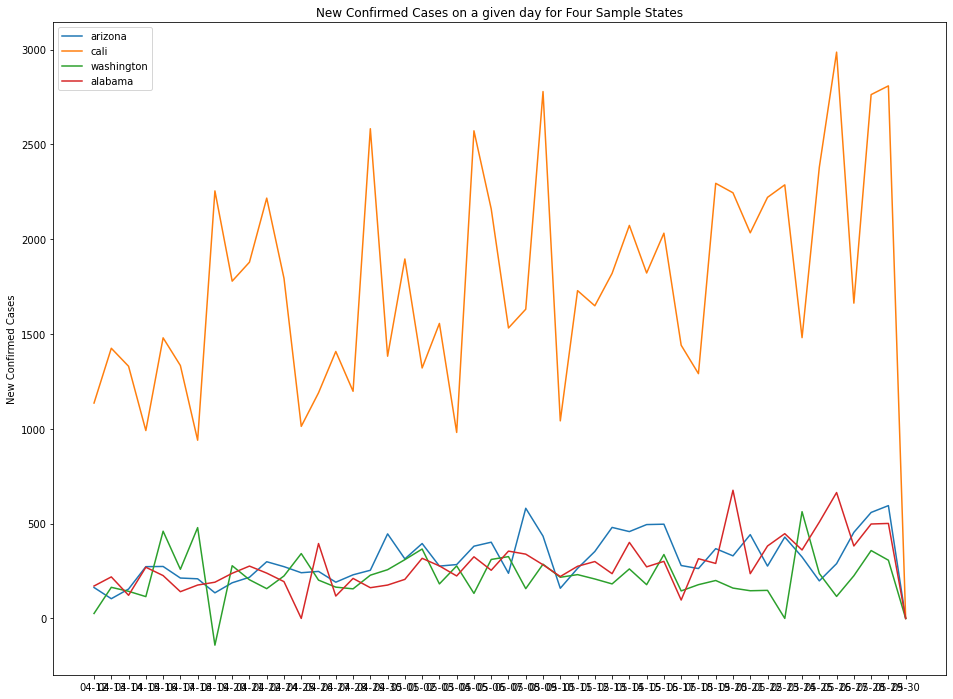

In [0]:
# plot this now

#Create plot
fig,ax = plt.subplots()
fig.set_size_inches(16,12)
fig.set_facecolor('w')  #Used for dark mode

plt.plot(new_arizona_stats['Last_Update'], new_arizona_stats['Confirmed'], label ='arizona')
plt.plot(new_cali_stats['Last_Update'], new_cali_stats['Confirmed'],label = 'cali')
plt.plot(new_washington_stats['Last_Update'], new_washington_stats['Confirmed'], label='washington')
plt.plot(new_alabama_stats['Last_Update'], new_alabama_stats['Confirmed'], label ='alabama')
plt.legend()
plt.title('New Confirmed Cases on a given day for Four Sample States')
plt.ylabel('New Confirmed Cases')
plt.show()

# __4. Testing with the WHO Confirmed Cases time series data__
WHO defines the confirmed case as "a person with laboratory confirmation of 2019-nCoV infection, irrespective of clinical signs and symptoms. "

https://github.com/CSSEGISandData/COVID-19/tree/master/who_covid_19_situation_reports/who_covid_19_sit_rep_time_series

In [1]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/who_covid_19_situation_reports/who_covid_19_sit_rep_time_series/who_covid_19_sit_rep_time_series.csv'
WHO_df = pd.read_csv(url, error_bad_lines=False)
WHO_df # this data is weird... it only goes goes from january 21 to april 3 and im not sure why the 'Province/States' column records Confirmed and Deaths. (oh its only like that for some)
# it lists the china and some other countries by province but the first 5 rows are like overall stats when they say deaths and confirmed in that column

Province/States    Country/Region  ...  5/12/2020  5/13/2020
0         Confirmed          Globally  ...  4088848.0  4170424.0
1            Deaths          Globally  ...   283153.0   287399.0
2         Confirmed             China  ...    84451.0    84458.0
3         Confirmed  Outside of China  ...  4004397.0  4085966.0
4            Deaths             China  ...     4644.0     4644.0
..              ...               ...  ...        ...        ...
262          Deaths               NaN  ...     9138.0     9259.0
263       Confirmed               NaN  ...  1743717.0  1781564.0
264          Deaths               NaN  ...   104549.0   106504.0
265       Confirmed               NaN  ...    46829.0    49429.0
266          Deaths               NaN  ...     1449.0     1500.0

[267 rows x 117 columns]

In [2]:
# rearrange the data a bit into a better format to do analysis on

WHO_df1 = WHO_df.transpose() # transpose it so the countries/regions are now in rows along the top
WHO_df1.iat[1,4] = 'China_Deaths' # renaming cells for clarity later
WHO_df1.iat[1,2] = 'China_Confirmed'

# relabel the 'China' cells
for every_column in range(0, WHO_df1.shape[1]):
  if WHO_df1.iat[1,every_column] == 'China':
    WHO_df1.iat[1,every_column] = WHO_df1.iat[0,every_column]
  else:
    pass

# for some reason a lot of the cells had an extra space at the end of their strings so remove that space if it exists
for n in range(0, WHO_df1.shape[0]):
  z = str(WHO_df1.iat[1,n])
  if z[-1] == ' ':
    WHO_df1.iat[1,n] = z[0:-1]
  else:
    pass

WHO_df1.columns = WHO_df1.iloc[1,:] # set the column names to be the country/Region
WHO_df1['Dates'] = WHO_df1.index # creates a new column based on the values of the indexes
col = WHO_df1.pop("Dates") # cut the dates column from where it was at the end of the table
WHO_df1.insert(0, col.name, col) # insert the column at column 0 of the data frame

# reformattig the date because it's too long
counter = WHO_df1.Dates.nunique() # getting the number of unique dates form the column dates in the data set WHO_df1
thing = np.arange(3,counter,1) # creating a vector from 3 till the end of the column

for i in thing: # reformat the date same code as used earlier
  rando = WHO_df1.iloc[i,0]
  WHO_df1.iloc[i,0] = rando[0:-5] # remove last 5 characters in the string corresponding to /2020

WHO_df1 # see what it looks like to check
WHO_df1.iloc[3::,0] = np.arange('2020-01-21', '2020-05-14', dtype = 'datetime64[D]')
WHO_df1

Country/Region             Dates     Globally  ...             NaN             NaN
Province/States  Province/States    Confirmed  ...       Confirmed          Deaths
Country/Region    Country/Region     Globally  ...             NaN             NaN
WHO region            WHO region          NaN  ...  African Region  African Region
1/21/2020             2020-01-21          282  ...             NaN             NaN
1/22/2020             2020-01-22          314  ...             NaN             NaN
...                          ...          ...  ...             ...             ...
5/9/2020              2020-05-09  3.85581e+06  ...           40544            1322
5/10/2020             2020-05-10  3.91737e+06  ...           42626            1369
5/11/2020             2020-05-11  4.00626e+06  ...           44533            1415
5/12/2020             2020-05-12  4.08885e+06  ...           46829            1449
5/13/2020             2020-05-13  4.17042e+06  ...           49429            1500

[117 rows x 268 columns]

## 4.1 i shall try plotting canada's cases 

ConversionError: ignored

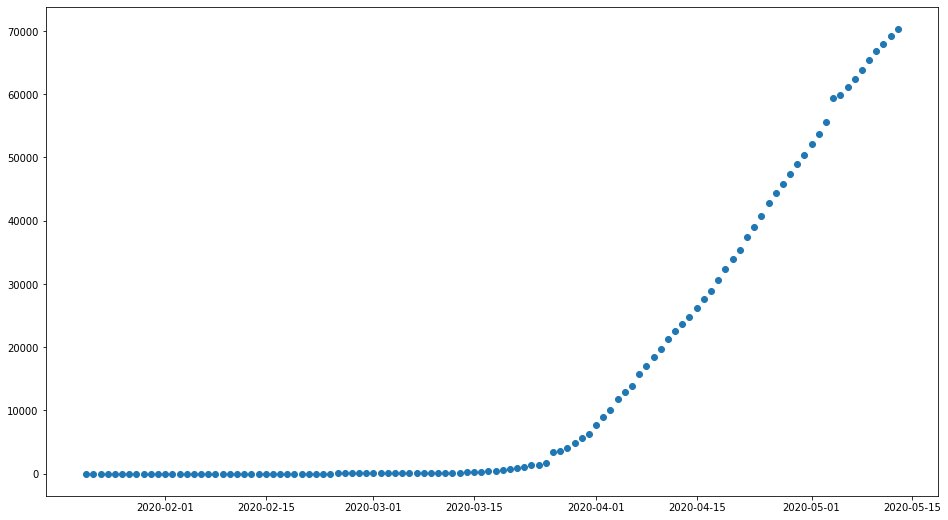

In [3]:
import matplotlib.pyplot as plt

col_canada = WHO_df1.columns.get_loc('Canada') # find which column number corresponds to the data for canada

# plot only a subset of the data on a linear scale 
plt.figure(figsize = (16,9))
plt.scatter(WHO_df1.iloc[3::,0],WHO_df1.iloc[3::,col_canada], label = 'Canada') # scatter plot canadas data on the y axis for rows 3 onwards versus the dates in column 0 from row 3 onwards and label it "canada"
plt.xlim('3/2', '4/3') # limit the data to march 2 onwards since the rest of the plot is just flat basically
plt.show()

# plot all the data on a log scale
plt.figure(figsize = (16,9))
plt.scatter(WHO_df1.iloc[3::,0],WHO_df1.iloc[3::,col_canada], label = 'Canada') # scatter plot canadas data on the y axis for rows 3 onwards versus the dates in column 0 from row 3 onwards and label it "canada"
#plt.xlim('3/2', '4/3') # limit the data to march 2 onwards since the rest of the plot is just flat basically
plt.yscale('log')
plt.show()


## 4.2 Now to generalize this to more Countries

Enter a country or a one of the provinces in china with first letter Capitalized. (enter 'plot' to display all selected countries data): United States
Error: Name is formatted incorrectly or does not exsit in this data set.
Enter a country or a one of the provinces in china with first letter Capitalized. (enter 'plot' to display all selected countries data): The United States
Error: Name is formatted incorrectly or does not exsit in this data set.
Enter a country or a one of the provinces in china with first letter Capitalized. (enter 'plot' to display all selected countries data): plot


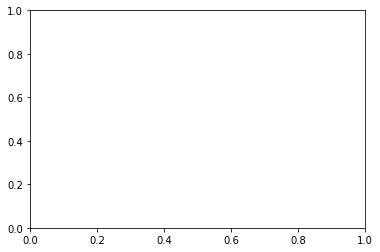

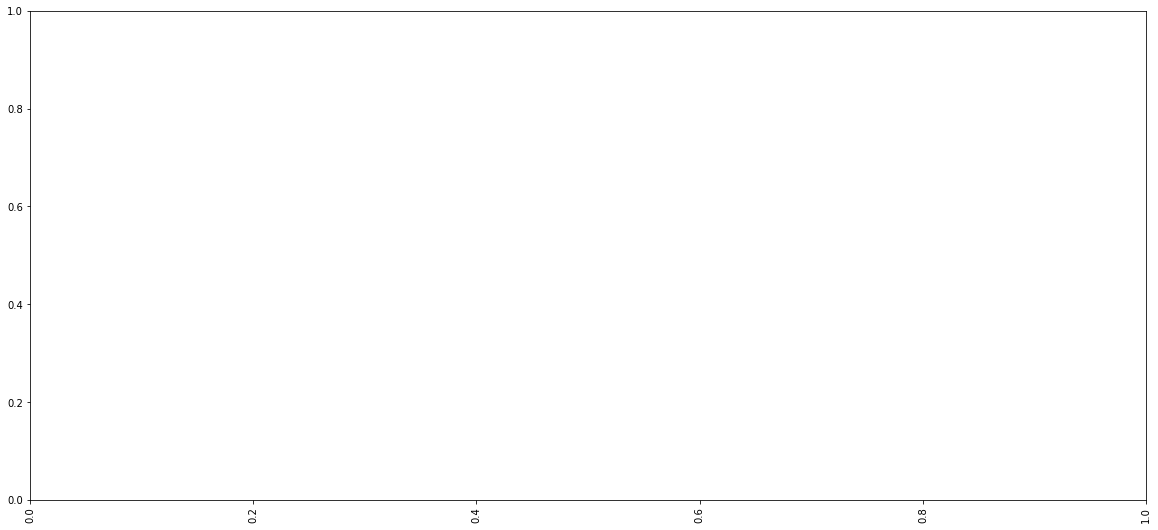

In [5]:
# a more generalized version trying to use all the states instead of just four but you can now select which states:
from termcolor import colored # oh dang colour is fun

Sentinel = 'some string'
entered = []
all_available = WHO_df1.iloc[1,:] # the complete list of countries from the second row of the df 
#available_provinces = WHO_df1.iloc[0,:]
all_available

# similar to above code for plotting state data from the US but modified for this data set
while Sentinel != 'plot':
  x = input("Enter a country or a one of the provinces in china with first letter Capitalized. (enter 'plot' to display all selected countries data): ")
  if x in all_available or x == 'China':
    if x == 'China':
      thing = input('if you want a specific province within China enter the province name, \nif you want overall stats for China Confirmed Cases enter a 0\nif you want overall stats for' 
      +' China deaths enter 1: ')
      if thing in all_available:
        entered.append(thing)
        print(colored("successfully added"))
      elif thing == '1':
        entered.append('China_Deaths')
      elif thing == '0':
        entered.append('China_Confirmed')
      else:
        print(colored(f'Error: Incorrect formatting or Province does not exist in this data: {thing}','red'))
    elif x not in entered:
      entered.append(x)
      print(colored("Country/Province has been added to list and will be plotted","green"))
    else:
      print(colored("This place has already been added to the plot",'yellow'))
  elif x == 'plot':
      Sentinel = x
  else:
    print(colored("Error: Name is formatted incorrectly or does not exsit in this data set.",'red'))

fig, ax = plt.subplots()
plt.figure(figsize = (20,9)) # create a figure of some size
fig.set_facecolor('w')
plt.xticks(rotation = 'vertical')

for place in entered:
  col_place = WHO_df1.columns.get_loc(f'{place}')

  try:
    to_plot = WHO_df1.iloc[3::,col_place]

    plt.subplot(121)
    plt.scatter(WHO_df1.iloc[3::,0], to_plot, label = f'{place} Stats') 
    plt.title('WHO data set Confirmed Cases By Country - Time Series LINEAR')
    plt.xlabel('Jan 21, 2020 - May 13, 2020')
    plt.ylabel('Stats')
    plt.xticks(rotation = 'vertical')
    plt.legend(loc='upper left')

    plt.subplot(122)
    plt.scatter(WHO_df1.iloc[3::,0], to_plot, label = f'{place} Stats') 
    plt.title('WHO data set Confirmed Cases By Country - Time Series LOGARITHMIC')
    plt.yscale('log')
    plt.xlabel('Jan 21, 2020 - May 13, 2020')
    plt.ylabel('Stats')
    plt.xticks(rotation = 'vertical')
    plt.legend(loc='upper left')
  except:
    pass

plt.xticks(rotation = 'vertical')
plt.show()

# __5. Google Trends Data (Seach data from google)__

In [0]:
# Load our data for use (This file was from google trends then i downloaded as a csv)
from google.colab import files
uploaded = files.upload()

Saving multiTimeline.csv to multiTimeline.csv


In [0]:
print(uploaded)

{'multiTimeline.csv': b'Category: All categories\n\nDay,Coronavirus: (Worldwide),news: (Worldwide),Weather: (Worldwide),Hand sanitizer: (Worldwide),Lockdown: (Worldwide)\n2020-02-13,8,11,31,<1,<1\n2020-02-14,7,10,29,<1,<1\n2020-02-15,6,10,30,<1,<1\n2020-02-16,6,10,32,<1,<1\n2020-02-17,6,10,29,<1,<1\n2020-02-18,5,10,29,<1,<1\n2020-02-19,5,10,29,<1,<1\n2020-02-20,5,11,31,<1,<1\n2020-02-21,8,10,31,<1,<1\n2020-02-22,12,9,31,<1,<1\n2020-02-23,18,10,32,<1,<1\n2020-02-24,21,12,31,<1,<1\n2020-02-25,25,12,31,<1,<1\n2020-02-26,30,12,31,<1,<1\n2020-02-27,30,12,31,<1,<1\n2020-02-28,32,12,30,1,<1\n2020-02-29,28,11,32,1,<1\n2020-03-01,26,11,30,<1,<1\n2020-03-02,33,12,29,1,<1\n2020-03-03,33,12,29,1,<1\n2020-03-04,34,13,29,1,<1\n2020-03-05,37,13,32,2,<1\n2020-03-06,37,13,34,1,<1\n2020-03-07,34,12,33,1,<1\n2020-03-08,38,12,30,1,<1\n2020-03-09,46,15,30,1,<1\n2020-03-10,54,15,30,2,<1\n2020-03-11,65,16,31,2,<1\n2020-03-12,93,22,32,3,<1\n2020-03-13,94,22,32,3,<1\n2020-03-14,88,20,35,3,<1\n2020-03-15,99,21,

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

#test google trend data:
Test_Data = pd.read_csv('multiTimeline.csv')
Test_Data # oh gosh why is there only one column :(

Category: All categories
Day        Coronavirus: (Worldwide) news: (Worldwide) Weather: (Worldwide) Hand sanitizer: (Worldwide)    Lockdown: (Worldwide)
2020-02-13 8                        11                31                   <1                                                <1
2020-02-14 7                        10                29                   <1                                                <1
2020-02-15 6                        10                30                   <1                                                <1
2020-02-16 6                        10                32                   <1                                                <1
...                                                                                                                         ...
2020-05-05 24                       12                30                   <1                                                <1
2020-05-06 24                       12                32                   <1                                                <1
2020-05-07 24                       13                30                   <1                                                <1
2020-05-08 23                       12                30                   <1                                                <1
2020-05-09 24                       12                34                   <1                                                <1

[88 rows x 1 columns]